<a href="https://colab.research.google.com/github/saindeepak/Stock_prediction/blob/master/stock_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Loading the dataset
data = pd.read_csv('https://github.com/saindeepak/Stock_prediction/raw/master/TATAMOTORS_new.csv')
data['a'] = np.array(data.index)

In [27]:
#getting overview of data
print('Rows',data.shape[0],'cols',data.shape[1])
data.dtypes
data.head(10)



Rows 272 cols 8


,Date,High Price,Low Price,Close Price,Total Traded Quantity,Turnover (in lacs),No. of Contracts,a
0,2/1/2018,403.80,390.55,393.65,7259426,28909.06969,30199,0
1,2/2/2018,397.40,381.30,383.75,10070356,39126.36188,36192,1
2,2/5/2018,398.00,380.00,395.80,9876017,38730.63195,47989,2
3,2/6/2018,379.85,356.50,375.45,25294860,93934.02167,72682,3
4,2/7/2018,385.40,375.20,377.80,12706795,48375.13603,37400,4
5,2/8/2018,380.00,372.20,374.85,12452396,46812.88947,29522,5
6,2/9/2018,373.20,368.00,368.75,8816777,32630.53462,25511,6
7,2/12/2018,376.20,370.20,371.80,6002369,22374.11372,29370,7
8,2/14/2018,382.30,370.60,376.85,9623436,36202.03222,42676,8
9,2/15/2018,382.20,373.10,375.80,10225880,38761.88479,33388,9


Text(0.5, 0, 'Date')

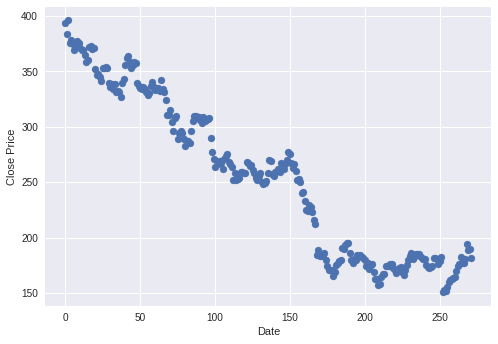

In [28]:
#plotting the data
plt.scatter(data['a'],data['Close Price'])
plt.ylabel('Close Price')
plt.xlabel('Date')


In [29]:
#Computing the pearson correlation coefficient
from scipy.stats.stats import pearsonr
pearsonr(data['a'],data['Close Price'])

(-0.9620383644583839, 2.689122989027628e-154)

In [0]:
#converting to numeric by coercing 
data['Close Price'] = pd.to_numeric(data['Close Price'], errors = 'coerce')
data['a'] = pd.to_numeric(data['a'],errors = 'coerce')

#dropping the null values
data.dropna(subset = ['a','Close Price'],inplace = True)


In [0]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.25)

In [32]:
#making a linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x_train = np.array(train['a']).reshape(-1,1)
y_train = np.array(train['Close Price'])

#fitting our model
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#parameters of a line
slope = np.asscalar(np.squeeze(regressor.coef_))
intercept = regressor.intercept_
print(slope,intercept)

-0.8726161450712532 372.9464139258722


Text(0.5, 0, 'Date')

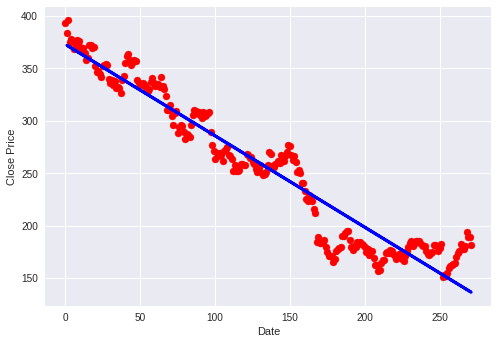

In [34]:
#Plotting a line 
plt.scatter(data['a'],data['Close Price'],color = 'red')
plt.plot(x_train, regressor.predict(x_train), color='blue', linewidth=3, label = 'Predicted Price') 
plt.ylabel('Close Price')
plt.xlabel('Date')


In [35]:
#finding the errors
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def pred_met(da,x,y):
  pred = da.predict(x)
  mae =  mean_absolute_error(y,pred)
  mse = mean_squared_error(y,pred)
  r2 = r2_score(y,pred)
  return mae,mse,r2
  
#for train data
tr_mae,tr_mse,tr_r2 = pred_met(regressor,x_train,y_train)
print(tr_mae,tr_mse,tr_r2)

15.634116387229128 358.8467621700804 0.9273846457948219


In [36]:
#linear model for test data
x_test = np.array(test['a']).reshape(-1,1)
y_test = np.array(test['Close Price'])

#predicting our model
y_pred = regressor.predict(x_test)

#Comparing the test and predicted values 
for i in range(10):
  print('y_test:',y_test[i],'y_pred:',y_pred[i])


y_test: 225.25 y_pred: 232.45521456940045
y_test: 336.05 y_pred: 321.46206136666825
y_test: 393.65 y_pred: 372.9464139258722
y_test: 180.85 y_pred: 164.3911552538427
y_test: 258.75 y_pred: 270.8503249525356
y_test: 309.45 y_pred: 308.37281919059944
y_test: 331.15 y_pred: 341.5322327033071
y_test: 252.1 y_pred: 275.21340567789184
y_test: 255.5 y_pred: 251.652769760968
y_test: 266.6 y_pred: 246.4170728905405


In [37]:
#Finding errors for test data
ts_mae,ts_mse,ts_r2 = pred_met(regressor,x_test,y_test)
print(ts_mae,ts_mse,ts_r2)

16.136022687346724 439.61863322101726 0.92038167161022


In [38]:
# Multiple linear model
features = ['a','High Price','Low Price','Total Traded Quantity','Turnover (in lacs)','No. of Contracts']
for col in features:
  data[col] = pd.to_numeric(data[col],errors = 'coerce')
  
data.dropna(subset = ['a','Close Price'],inplace = True)
for col in features:
  print(col,pearsonr(data[col],data['a']))

a (1.0, 0.0)
High Price (-0.9625563972441867, 4.3578565577586054e-155)
Low Price (-0.9625630773311913, 4.256070262945317e-155)
Total Traded Quantity (0.24315208226401488, 5.063290353001089e-05)
Turnover (in lacs) (-0.09145220890562834, 0.13245865889676384)
No. of Contracts (0.0893046373074747, 0.14183183231975807)


In [0]:
#splitting train and test data as before
reg_cols = ['a','Total Traded Quantity','No. of Contracts']
multi_x = np.column_stack(tuple(data[col] for col in reg_cols))
mul_train_x,mul_test_x,mul_train_y,mul_test_y = train_test_split(multi_x,data['Close Price'],test_size = 0.25)

In [40]:
#making a linear model
reg2 = LinearRegression()
#fitting our model
reg2.fit(mul_train_x,mul_train_y)

#parameters of a line
mul_intercept = reg2.intercept_
print(mul_intercept)



374.7045215873297


In [41]:
#finding the errors  
#for train data
mul_tr_mae,mul_tr_mse,mul_tr_r2 = pred_met(reg2,mul_train_x,mul_train_y)
print(mul_tr_mae,mul_tr_mse,mul_tr_r2)

16.07547428398372 398.68327075937214 0.9199478180985676


In [42]:
#Multi-linear model for test data
#predicting our model
mul_y_pred = reg2.predict(mul_test_x)

#Finding the errors for test data
mul_ts_mae,mul_ts_mse,mul_ts_r2 = pred_met(reg2,mul_test_x,mul_test_y)
print(mul_ts_mae,mul_ts_mse,mul_ts_r2)

14.877324310730978 308.0967263813077 0.942645714173087
